In [3]:
"""
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeleeladekunlefijabi/ship-performance-clustering-dataset")

print("Path to dataset files:", path)
"""

C:\Users\OMISTAJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|████████████████████████████████████████████████████████████████████████████████| 304k/304k [00:00<00:00, 711kB/s]

Extracting files...
Path to dataset files: C:\Users\OMISTAJA\.cache\kagglehub\datasets\jeleeladekunlefijabi\ship-performance-clustering-dataset\versions\1


In [4]:
import pandas as pd
df = pd.read_csv(f"{path}/Ship_Performance_Dataset.csv")

In [7]:
df.sample(5)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
454,2024-06-23,Fish Carrier,Long-haul,Diesel,Fair,11.140728,1528.431105,732.985690,7.242290,Moderate,1306.900336,189922.983121,512255.761769,59.255201,0.812073,0.573914,2,95.371135
2553,2024-04-14,Bulk Carrier,Long-haul,Steam Turbine,Fair,16.174124,1128.579065,458.099176,14.300941,Rough,675.004801,196315.451460,602551.566682,52.195971,1.291036,1.287939,5,68.255847
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
2694,2023-09-17,Fish Carrier,Transoceanic,Steam Turbine,Fair,17.777812,2620.740095,246.758526,13.757821,Calm,1140.958711,497508.350451,711034.954901,38.406782,0.695721,1.320267,2,97.017882
44,2024-04-07,Container Ship,Transoceanic,Diesel,Good,16.010103,2523.390179,491.259922,13.890456,Rough,1992.298745,492122.240632,884546.050947,60.457977,0.832325,1.435104,4,96.161166


In [8]:
df.describe(include='object')

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
count,2736,2600,2600,2600,2600,2600
unique,57,4,4,3,3,3
top,2023-06-04,Bulk Carrier,Long-haul,Diesel,Good,Calm
freq,48,669,686,892,873,893


In [14]:
print(f"{df.Weather_Condition.unique()=}")
print(f"{df.Maintenance_Status.unique()=}")
print(f"{df.Ship_Type.unique()=}")

df.Weather_Condition.unique()=array(['Moderate', 'Rough', 'Calm', nan], dtype=object)
df.Maintenance_Status.unique()=array(['Critical', 'Good', 'Fair', nan], dtype=object)
df.Ship_Type.unique()=array(['Container Ship', 'Fish Carrier', 'Bulk Carrier', nan, 'Tanker'],
      dtype=object)


In [15]:
df.describe(exclude="object")

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [16]:
print(df.select_dtypes(include='object').isnull().sum())

Date                    0
Ship_Type             136
Route_Type            136
Engine_Type           136
Maintenance_Status    136
Weather_Condition     136
dtype: int64


In [17]:
print(df.select_dtypes(exclude='object').isnull().sum())

Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


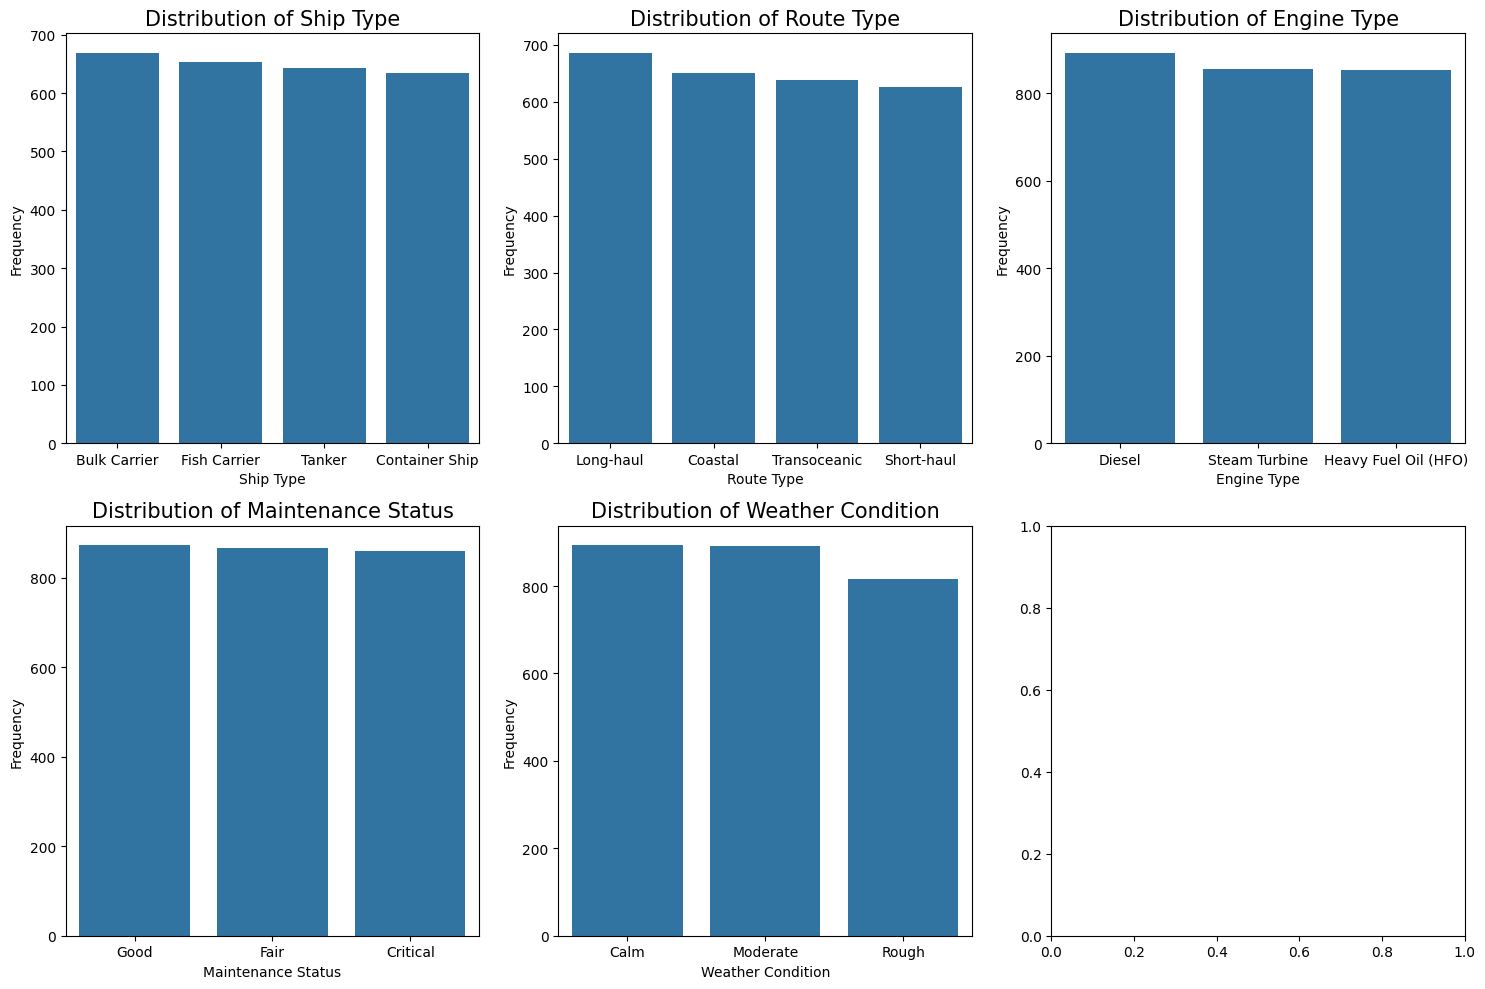

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Loop through the object columns in the DataFrame
for i, col in enumerate(df.select_dtypes(include='object').columns.tolist()[1:]):
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    axes[i].set_xlabel(f'{col.replace("_", " ").title()}')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


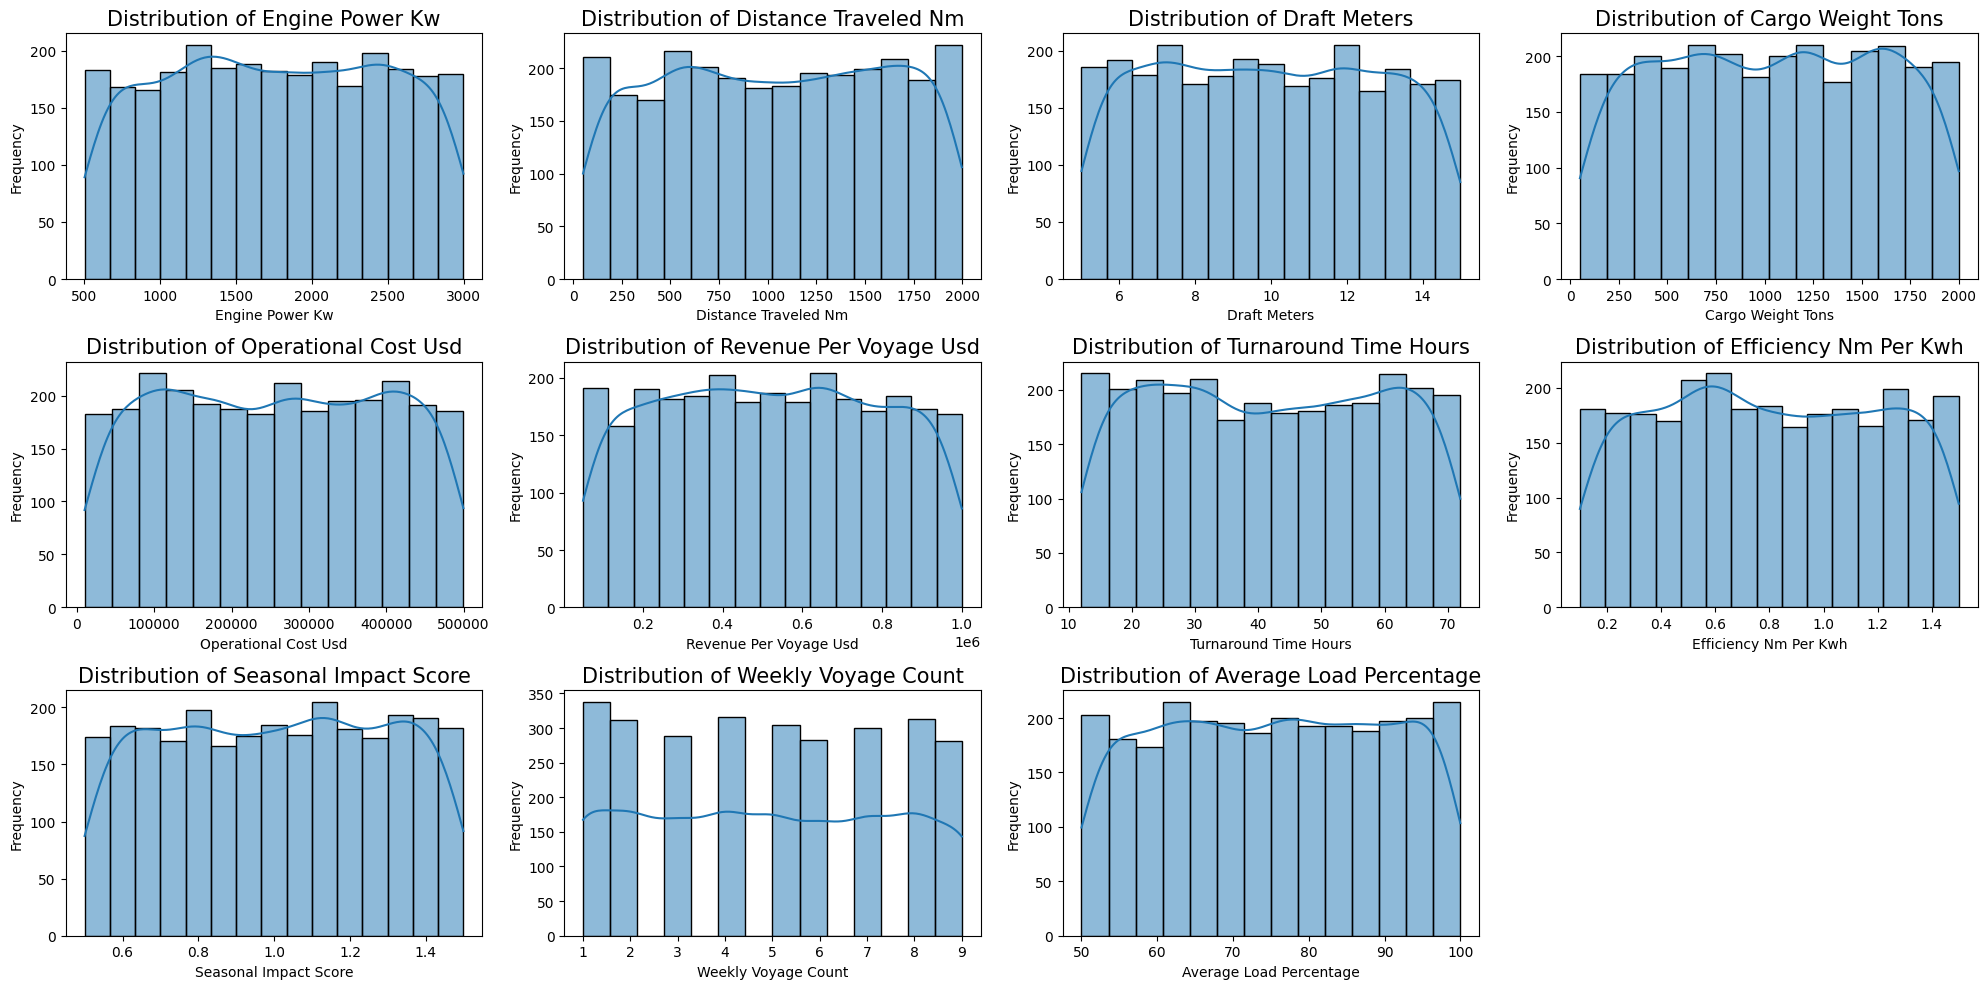

In [35]:
# Create a figure and a grid of subplots
plt.figure(figsize=(20, 10))

# Loop through the object columns in the DataFrame
for i, col in enumerate(df.select_dtypes(exclude='object').columns.tolist()[1:]):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


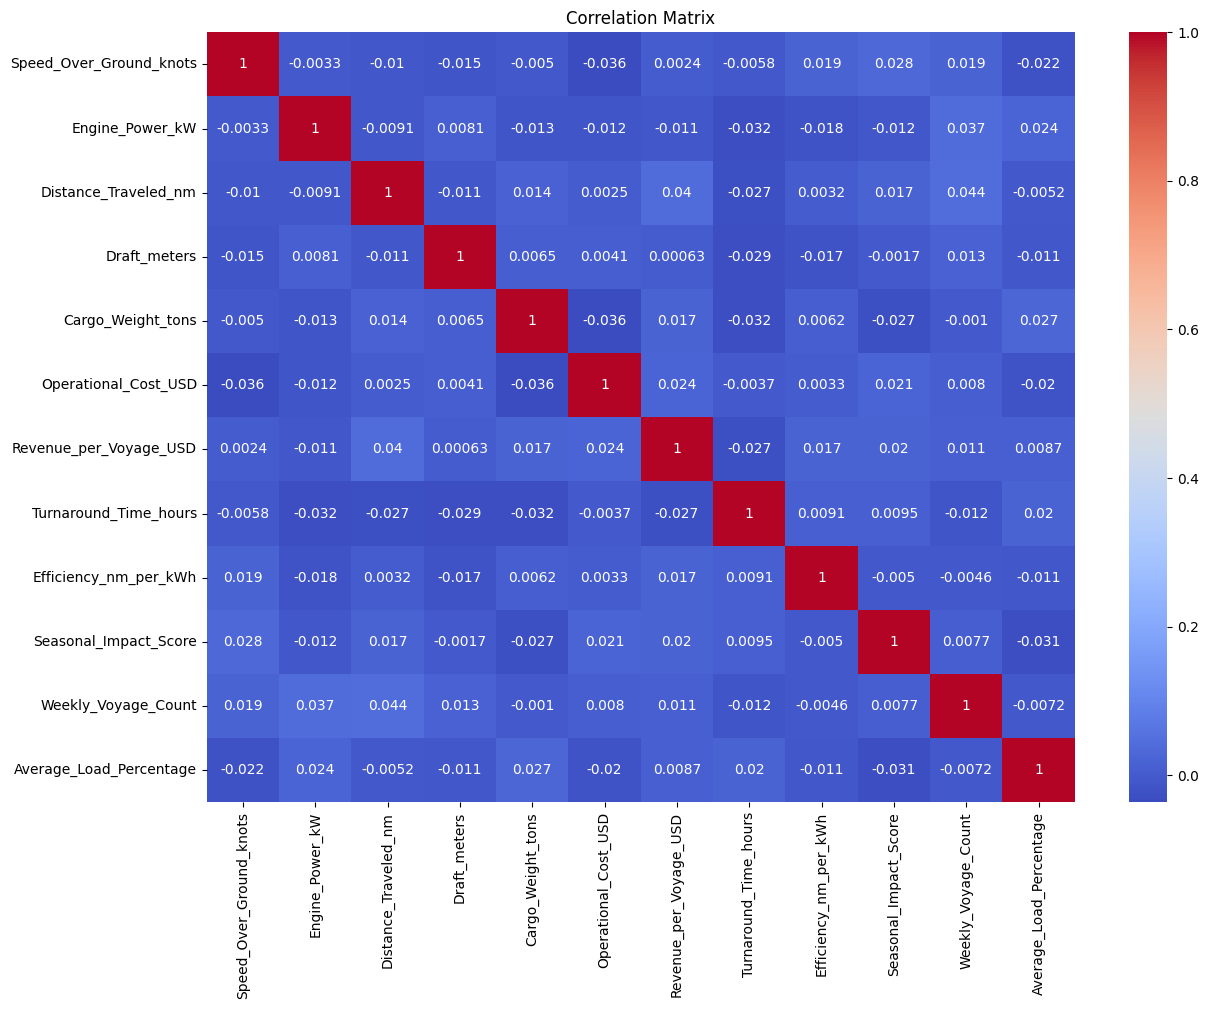

In [40]:
df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(14,10))

sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
